#Homework 3

##Problem 1

###1a

In [ ]:
'''
Assuming reasonable functional forms for $f(y)$ and $g(x)$ use phase plane analysis to demonstrate that
the double positive feedback loop can be bistable.
Include nullclines for $x$, $y$ , as well as fixed points in your plots.
Include all values of model parameters.
'''

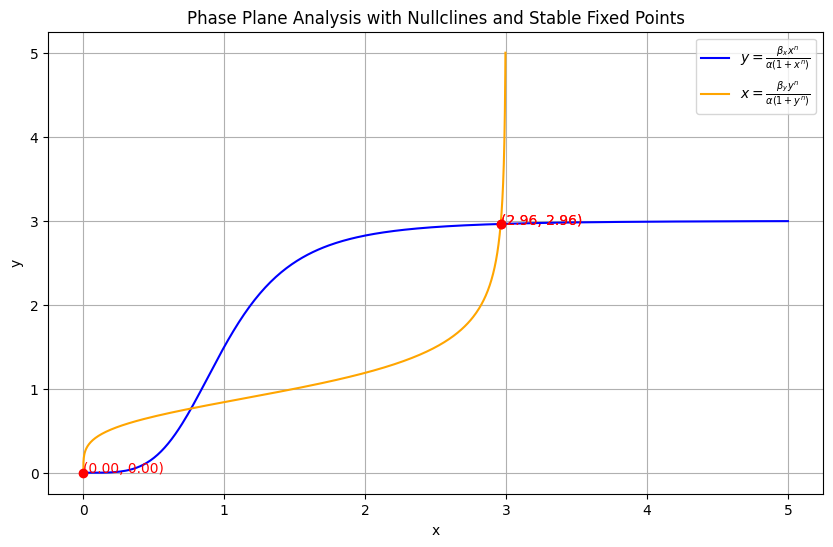

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Params
beta_x = 3
beta_y = 3
alpha = 1
n = 4

# range for x and y
x_vals = np.linspace(0, 5, 400)
y_vals = np.linspace(0, 5, 400)

# nullclines for x and y
def nullcline_x(y):
    return (beta_y * y**n) / (alpha * (1 + y**n))

def nullcline_y(x):
    return (beta_x * x**n) / (alpha * (1 + x**n))

# Calculate the nullclines
x_nullcline = nullcline_x(y_vals)
y_nullcline = nullcline_y(x_vals)

# Plotting nullclines
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_nullcline, label=r'$y = \frac{\beta_x x^n}{\alpha(1 + x^n)}$', color='blue')
plt.plot(x_nullcline, y_vals, label=r'$x = \frac{\beta_y y^n}{\alpha(1 + y^n)}$', color='orange')

# Find fixed points by solving the system of equations
def fixed_points_eq(p):
    x, y = p
    return [
        x - nullcline_x(y),  # x nullcline
        y - nullcline_y(x)   # y nullcline
    ]

# Use initial guesses to find fixed points
initial_guesses = [(0, 0), (5, 5), (15, 15)]
fixed_points = [fsolve(fixed_points_eq, guess) for guess in initial_guesses]

# Plot fixed points
for point in fixed_points:
    plt.plot(*point, 'ro')  # Plot each fixed point as a red dot
    plt.text(point[0], point[1], f'({point[0]:.2f}, {point[1]:.2f})', color='red')

# labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Plane Analysis with Nullclines and Stable Fixed Points')
plt.legend()
plt.grid()
plt.show()


[1] [1]
[0] [-0.5]


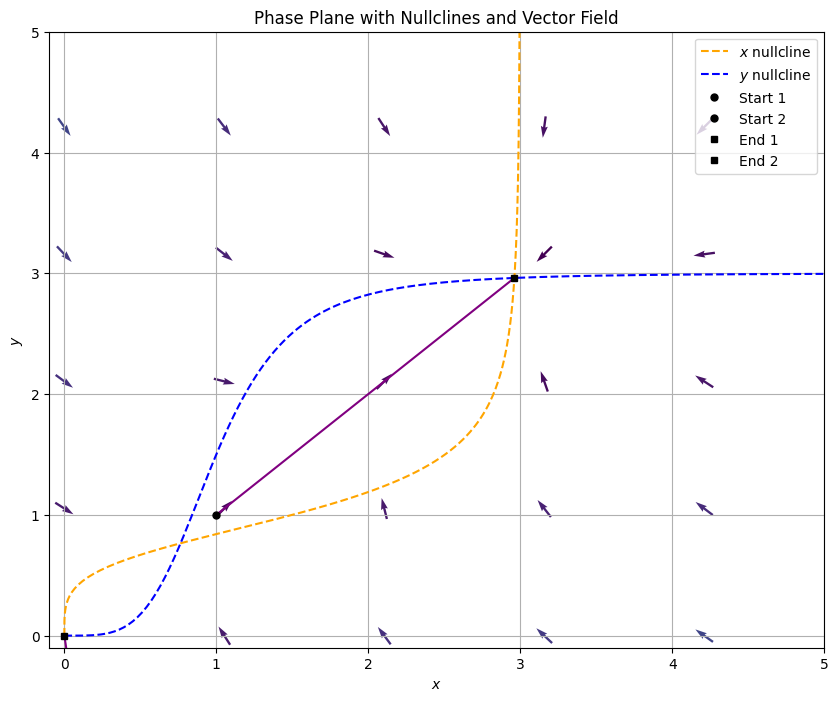

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Params for nonlinear system
beta_x = 3
beta_y = 3
alpha = 1
n = 4

# Define system
def nonlinear_system(state, t, beta_x, beta_y, alpha, n):
    x, y = state
    dxdt = beta_y * y**n / (1 + y**n) - alpha * x
    dydt = beta_x * x**n / (1 + x**n) - alpha * y
    return [dxdt, dydt]

# nullcline functions
def nullcline_x(y):
    return (beta_y * y**n) / (alpha * (1 + y**n))

def nullcline_y(x):
    return (beta_x * x**n) / (alpha * (1 + x**n))

# Define the phase plane plotting function
def phaseplane_nonlin(t_end=10, x01=[1, 1], x02=[0, -0.5], filename='1a.png'):
    # trajectories for initial conditions
    t = np.linspace(0, t_end, 1000)
    sol1 = odeint(nonlinear_system, x01, t, args=(beta_x, beta_y, alpha, n))
    sol2 = odeint(nonlinear_system, x02, t, args=(beta_x, beta_y, alpha, n))

    # grid for vector field
    x = np.linspace(0, 20, 20)
    y = np.linspace(0, 20, 20)
    X, Y = np.meshgrid(x, y)

    # Calculate derivatives at each point on the grid
    DX, DY = nonlinear_system([X, Y], 0, beta_x, beta_y, alpha, n)
    M = np.hypot(DX, DY)  # Normalizing for consistent arrow lengths
    M[M == 0] = 1         # Avoid divide by zero errors
    DX /= M
    DY /= M

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot nullclines
    y_vals = np.linspace(0, 12, 400)
    x_vals = np.linspace(0, 12, 400)
    ax.plot(nullcline_x(y_vals), y_vals, 'orange', linestyle='--', label='$x$ nullcline')
    ax.plot(x_vals, nullcline_y(x_vals), 'blue', linestyle='--', label='$y$ nullcline')

    # Plot trajectories
    ax.plot(sol1[:, 0], sol1[:, 1], color='purple')
    ax.plot(sol2[:, 0], sol2[:, 1], color='purple')
    ax.plot([x01[0]], [x01[1]], 'o', color='black', markersize=5, label='Start 1')
    ax.plot([x02[0]], [x02[1]], 'o', color='black', markersize=5, label='Start 2')
    ax.plot(sol1[-1, 0], sol1[-1, 1], 's', color='black', markersize=5, label='End 1')
    ax.plot(sol2[-1, 0], sol2[-1, 1], 's', color='black', markersize=5, label='End 2')

    print([x01[0]], [x01[1]])
    print([x02[0]], [x02[1]])
    # Vector field
    ax.quiver(X, Y, DX, DY, M, pivot='mid')

    # Labels, legend, and grid
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim(-0.1, 5)
    ax.set_ylim(-0.1, 5)
    ax.legend()
    ax.grid()

    plt.title('Phase Plane with Nullclines and Vector Field')
    plt.savefig(filename, facecolor='white')
    plt.show()

# plot
phaseplane_nonlin()


In [48]:
from google.colab import files
files.download('1a.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###1b

<ipython-input-50-4b0ea8d3f28f>:30: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol2 = odeint(nonlinear_system, x02, t, args=(beta_x, beta_y, alpha, n))


[1] [1]
[0] [-0.5]


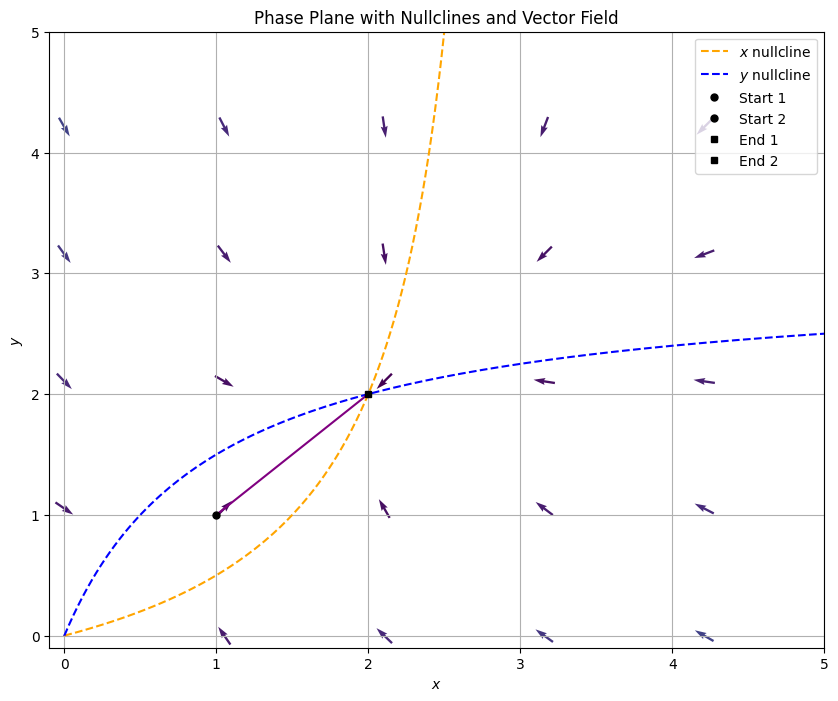

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Params for nonlinear system
beta_x = 3
beta_y = 3
alpha = 1
n = 1 # Update n = 1

# Define the nonlinear system
def nonlinear_system(state, t, beta_x, beta_y, alpha, n):
    x, y = state
    dxdt = beta_y * y**n / (1 + y**n) - alpha * x
    dydt = beta_x * x**n / (1 + x**n) - alpha * y
    return [dxdt, dydt]

# nullcline functions
def nullcline_x(y):
    return (beta_y * y**n) / (alpha * (1 + y**n))

def nullcline_y(x):
    return (beta_x * x**n) / (alpha * (1 + x**n))

# Define the phase plane plotting function
def phaseplane_nonlin(t_end=10, x01=[1, 1], x02=[0, -0.5], filename='1b.png'):
    # trajectories for initial conditions
    t = np.linspace(0, t_end, 1000)
    sol1 = odeint(nonlinear_system, x01, t, args=(beta_x, beta_y, alpha, n))
    sol2 = odeint(nonlinear_system, x02, t, args=(beta_x, beta_y, alpha, n))

    # Create grid for vector field
    x = np.linspace(0, 20, 20)
    y = np.linspace(0, 20, 20)
    X, Y = np.meshgrid(x, y)

    # Calculate derivatives at each point on the grid
    DX, DY = nonlinear_system([X, Y], 0, beta_x, beta_y, alpha, n)
    M = np.hypot(DX, DY)  # Normalizing for consistent arrow lengths
    M[M == 0] = 1         # Avoid divide by zero errors
    DX /= M
    DY /= M

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot nullclines
    y_vals = np.linspace(0, 12, 400)
    x_vals = np.linspace(0, 12, 400)
    ax.plot(nullcline_x(y_vals), y_vals, 'orange', linestyle='--', label='$x$ nullcline')
    ax.plot(x_vals, nullcline_y(x_vals), 'blue', linestyle='--', label='$y$ nullcline')

    # Plot trajectories
    ax.plot(sol1[:, 0], sol1[:, 1], color='purple')
    ax.plot(sol2[:, 0], sol2[:, 1], color='purple')
    ax.plot([x01[0]], [x01[1]], 'o', color='black', markersize=5, label='Start 1')
    ax.plot([x02[0]], [x02[1]], 'o', color='black', markersize=5, label='Start 2')
    ax.plot(sol1[-1, 0], sol1[-1, 1], 's', color='black', markersize=5, label='End 1')
    ax.plot(sol2[-1, 0], sol2[-1, 1], 's', color='black', markersize=5, label='End 2')

    print([x01[0]], [x01[1]])
    print([x02[0]], [x02[1]])
    # Vector field
    ax.quiver(X, Y, DX, DY, M, pivot='mid')

    # Labels, legend, and grid
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim(-0.1, 5)
    ax.set_ylim(-0.1, 5)
    ax.legend()
    ax.grid()

    plt.title('Phase Plane with Nullclines and Vector Field')
    plt.savefig(filename, facecolor='white')
    plt.show()

# plot
phaseplane_nonlin()


In [51]:
from google.colab import files
files.download('1b.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###1c

[1] [1]
[0] [-0.5]
11.998287587713367 11.998287587713367
0.0 -2.270056280202677e-05


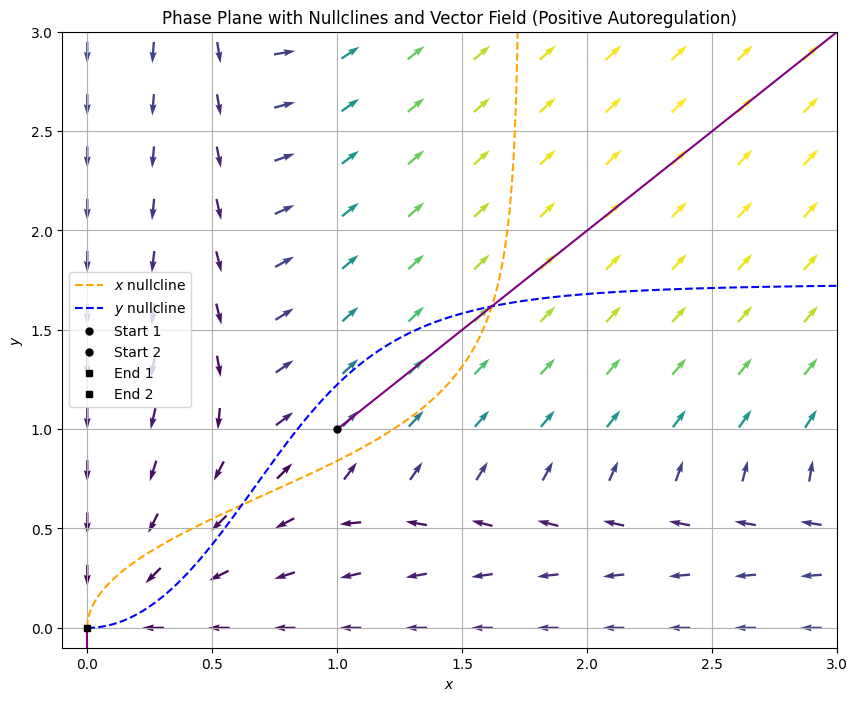

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve

# Model params
beta_xy = 3
beta_yx = 3
beta_x = 4
beta_y = 4
alpha = 1
n = 4

# Define the system with positive autoregulation and AND logic
def positive_autoregulation_system(state, t, beta_xy, beta_yx, beta_x, beta_y, alpha, n):
    x, y = state
    dxdt = (beta_xy * y**n / (1 + y**n)) * (beta_x * x**n / (1 + x**n)) - alpha * x
    dydt = (beta_yx * x**n / (1 + x**n)) * (beta_y * y**n / (1 + y**n)) - alpha * y
    return [dxdt, dydt]

#nullcline functions (where dx/dt = 0 or dy/dt = 0)
def nullcline_x(y):
    return np.sqrt((beta_xy * y**n / (alpha * (1 + y**n))))

def nullcline_y(x):
    return np.sqrt((beta_yx * x**n / (alpha * (1 + x**n))))

# plotting function
def phaseplane_positive_autoreg(t_end=10, x01=[1, 1], x02=[0, -0.5], filename='1c.png'):
    # trajectories for initial conditions
    t = np.linspace(0, t_end, 1000)
    sol1 = odeint(positive_autoregulation_system, x01, t, args=(beta_xy, beta_yx, beta_x, beta_y, alpha, n))
    sol2 = odeint(positive_autoregulation_system, x02, t, args=(beta_xy, beta_yx, beta_x, beta_y, alpha, n))

    # Create grid for vector field
    x = np.linspace(0, 5, 20)
    y = np.linspace(0, 5, 20)
    X, Y = np.meshgrid(x, y)

    # derivatives at each point on the grid
    DX, DY = positive_autoregulation_system([X, Y], 0, beta_xy, beta_yx, beta_x, beta_y, alpha, n)
    M = np.hypot(DX, DY)  # Normalizing for consistent arrow lengths
    M[M == 0] = 1         # Avoid divide by zero errors
    DX /= M
    DY /= M

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot nullclines
    y_vals = np.linspace(0, 5, 400)
    x_vals = np.linspace(0, 5, 400)
    ax.plot(nullcline_x(y_vals), y_vals, 'orange', linestyle='--', label='$x$ nullcline')
    ax.plot(x_vals, nullcline_y(x_vals), 'blue', linestyle='--', label='$y$ nullcline')

    # Plot trajectories
    ax.plot(sol1[:, 0], sol1[:, 1], color='purple')
    ax.plot(sol2[:, 0], sol2[:, 1], color='purple')
    ax.plot([x01[0]], [x01[1]], 'o', color='black', markersize=5, label='Start 1')
    ax.plot([x02[0]], [x02[1]], 'o', color='black', markersize=5, label='Start 2')
    print([x01[0]], [x01[1]])
    print([x02[0]], [x02[1]])
    ax.plot(sol1[-1, 0], sol1[-1, 1], 's', color='black', markersize=5, label='End 1')
    ax.plot(sol2[-1, 0], sol2[-1, 1], 's', color='black', markersize=5, label='End 2')
    print(sol1[-1, 0], sol1[-1, 1])
    print(sol2[-1, 0], sol2[-1, 1])

    # Vector field
    ax.quiver(X, Y, DX, DY, M, pivot='mid')

    # Labels, legend, grid
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim(-0.1, 3)
    ax.set_ylim(-0.1, 3)
    ax.legend()
    ax.grid()

    plt.title('Phase Plane with Nullclines and Vector Field (Positive Autoregulation)')
    plt.savefig(filename, facecolor='white')
    plt.show()

# plot
phaseplane_positive_autoreg()


In [84]:
from google.colab import files
files.download('1c.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Problem 2

In [ ]:
'''
Stability analysis. Taking $k_1=v_0=1$, analyze the stability of the fixed point(s) as a function of $k_2$.
What different possible stability classes do you find?
Plot an illustrative trajectory from each class and be sure to label your plots with the corresponding value of $k_2$.
'''

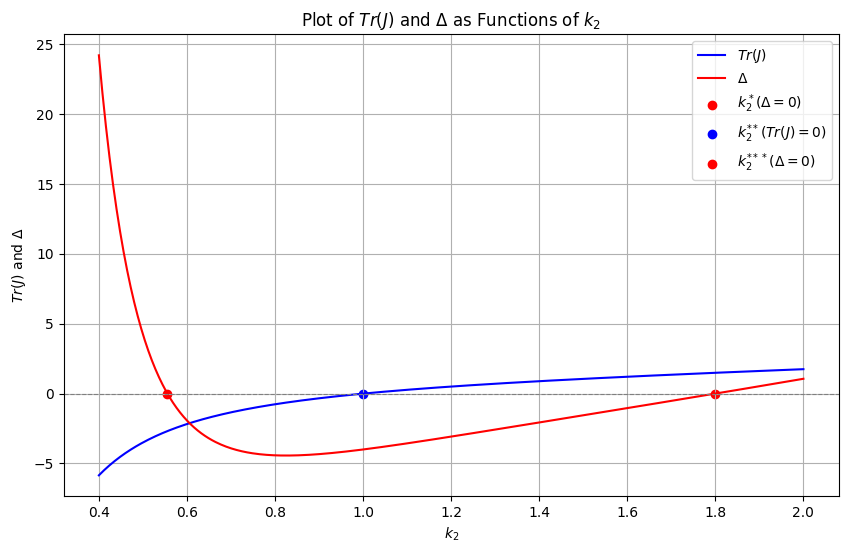

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define functions for Trace and corrected Delta
def trace_J(k2):
    return k2 - (1 / k2**2)

def delta_J(k2):
    return k2**2 - (6 / k2) + (1 / k2**4)

# Generate a range of k2 values
k2_values = np.linspace(0.4, 2, 400)

# Calculate trace and corrected delta for each k2
trace_values = trace_J(k2_values)
delta_values = delta_J(k2_values)

# Find where trace or delta equal zero
trace_zero_k2 = fsolve(trace_J, 1.0)[0]
delta_zero_k2 = fsolve(delta_J, 1.5)[0]
delta_zero_k2_2 = fsolve(delta_J, 0.5)[0]

# Plot Trace and corrected Delta as functions of k2
plt.figure(figsize=(10, 6))
plt.plot(k2_values, trace_values, label=r'$Tr(J)$', color='blue')
plt.plot(k2_values, delta_values, label=r'$\Delta$', color='red')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

# Mark the critical points
plt.scatter(delta_zero_k2_2, 0, color='red', marker='o', label=r'$k_2^* (\Delta = 0)$')
plt.scatter(trace_zero_k2, 0, color='blue', marker='o', label=r'$k_2^{**} (Tr(J) = 0)$')
plt.scatter(delta_zero_k2, 0, color='red', marker='o', label=r'$k_2^{***} (\Delta = 0)$')

# Labels and legends
plt.xlabel(r'$k_2$')
plt.ylabel(r'$Tr(J)$ and $\Delta$')
plt.title(r'Plot of $Tr(J)$ and $\Delta$ as Functions of $k_2$')
plt.legend()
plt.grid(True)
plt.savefig('2c.png')
plt.show()


In [21]:
print(f'Trace = 0 at k_2 = {trace_zero_k2}')
print(f'Delta = 0 at k_2 = {delta_zero_k2}')
print(f'Delta = 0 at k_2 = {delta_zero_k2_2}')


Trace = 0 at k_2 = 1.0
Delta = 0 at k_2 = 1.799632345152002
Delta = 0 at k_2 = 0.5556690524561225


In [24]:
from google.colab import files
files.download('2c.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Problem 3

##Problem 4

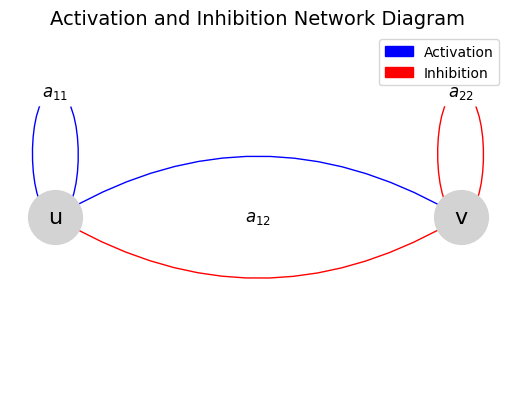

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyArrowPatch, Patch

# create directed graph object
G = nx.DiGraph()

# Add nodes for u and v
G.add_node("u", pos=(0, 1))
G.add_node("v", pos=(1, 1))

# Add edges with labels for activation and inhibition
# `a_{11}` is self-activation on `u`
# `a_{22}` is self-inhibition on `v`
# `a_{12}` is activation from `v` to `u`
# `a_{21}` is inhibition from `u` to `v`
G.add_edge("u", "u", label=r"$a_{11}$", connectionstyle="arc3,rad=0.3", color="blue")  # self-activation
G.add_edge("v", "v", label=r"$a_{22}$", connectionstyle="arc3,rad=0.3", color="red")   # self-inhibition
G.add_edge("v", "u", label=r"$a_{12}$", color="blue")  # activation
G.add_edge("u", "v", label=r"$a_{21}$", color="red")   # inhibition

# Position nodes
pos = nx.get_node_attributes(G, 'pos')

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color="lightgray")
nx.draw_networkx_labels(G, pos, font_size=16, font_color="black")

# Draw edges with color and labels
edge_labels = nx.get_edge_attributes(G, 'label')
colors = [G[u][v]['color'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrowstyle="->", arrowsize=20, edge_color=colors, connectionstyle="arc3,rad=0.3")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

#legend
legend_elements = [
    Patch(facecolor="blue", edgecolor="blue", label="Activation"),
    Patch(facecolor="red", edgecolor="red", label="Inhibition")
]
plt.legend(handles=legend_elements, loc="upper right")

# plot
plt.axis('off')
plt.title("Activation and Inhibition Network Diagram", fontsize=14)
plt.show()


Looks horrible, going to make a different figure on powerpoint